In [13]:
 def set_plot_param():
    """Set my own customized plotting parameters"""
    mpl.rc('axes', edgecolor='grey')
    mpl.rc('axes', labelcolor='black')
    mpl.rc('xtick', color='black')
    mpl.rc('xtick', labelsize=12)
    mpl.rc('ytick', color='black')
    mpl.rc('ytick', labelsize=12)
    mpl.rc('axes', titlesize=18)
    mpl.rc('axes', labelsize=12)
    mpl.rc('legend', fontsize='large')
    mpl.rc('text', color='black')

In [4]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    

    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []
        mean_newvalue_hist[scenario][taxa] = {}
        mean_newvalue_fut[scenario][taxa] = {}
        mean_sumbin_hist[scenario][taxa] = {}
        mean_sumbin_fut[scenario][taxa] = {}
        
        mean_over_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_fut[scenario][taxa] = {}

        mean_over_all_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_fut[scenario] [taxa]= {}

        for sdm in sdms:
            mean_newvalue_hist[scenario][taxa][sdm] = {}
            mean_newvalue_fut[scenario][taxa][sdm] = {}
            mean_sumbin_hist[scenario][taxa][sdm] = {}
            mean_sumbin_fut[scenario][taxa][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = {}
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][taxa][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][taxa][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][taxa][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



In [5]:
ncfname_ssp126 = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

da_landuse_ssp126 = xr.open_dataset(ncfname_ssp126, decode_times=False)
land_mask=da_landuse_ssp126["primf"].isel(time=0)


In [6]:
da_landuse_ssp126

<xarray.Dataset>
Dimensions:    (time: 86, lon: 720, lat: 360, bounds: 2)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 81.0 82.0 83.0 84.0 85.0
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Dimensions without coordinates: bounds
Data variables: (12/15)
    c3ann      (time, lat, lon) float32 ...
    c3nfx      (time, lat, lon) float32 ...
    c3per      (time, lat, lon) float32 ...
    c4ann      (time, lat, lon) float32 ...
    c4per      (time, lat, lon) float32 ...
    pastr      (time, lat, lon) float32 ...
    ...         ...
    secdf      (time, lat, lon) float32 ...
    secdn      (time, lat, lon) float32 ...
    secma      (time, lat, lon) float32 ...
    secmb      (time, lat, lon) float32 ...
    time_bnds  (time, bounds) int32 ...
    urban      (time, lat, lon) float32 ...
Attributes: (12/28)
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.6
    source:                  LUH2 v2.1f: Land-Use Harmonization Data Set
    institution:             University of Maryland (UofMD), College Park, MD...
    host:                    UMD College Park
    comment:                 LUH2
    ...                      ...
    source_id:               UofMD-landState-IMAGE-ssp126-2-1-f
    variable_id:             multiple-states
    tracking_id:             hdl:21.14100/329081ac-5a16-4170-8654-bf3bfc9beca2
    history:                 Sun Mar 05 15:20:57 2023: cdo remapbil,gfdl-esm4...
    NCO:                     netCDF Operators version 5.0.6 (Homepage = http:...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

NameError: name 'plot_idx' is not defined

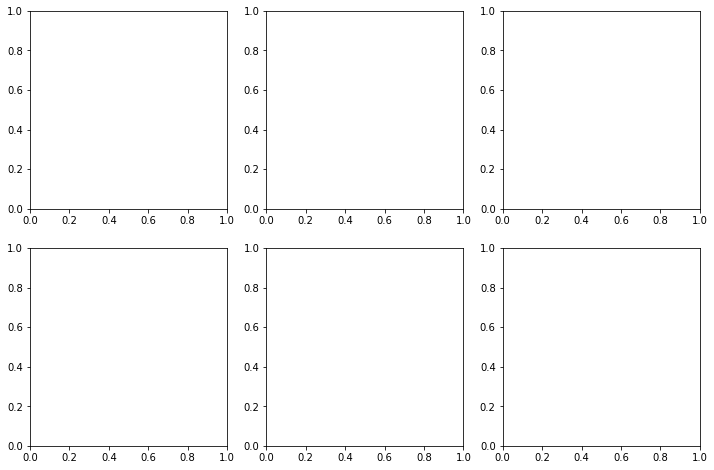

In [15]:
import matplotlib.pyplot as plt

# Example colors and labels for the pie chart segments
colors = ['#2a6a99', '#c44e52', 'grey']  # Adding grey shades for no change
labels = ['CC Gain', 'CC Loss', 'No Change']
subplot_labels = ['a)', 'b)','c)','d)','e)','f)']

# No need to calculate total_area here as it was done in each loop iteration

taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]
scenario_indices = {"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}

num_scenarios = len(scenarios)
num_taxas = len(taxas)

fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 8))  # Adjust figsize as needed

# Loop through scenarios and taxa to plot
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Assuming the plotting code for pie charts is correctly implemented here
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_cc,
                    loss_area_cc ,
                    no_change_area  ]
        # Determine the correct axis for plotting
        ax = axes[j, i] if num_scenarios > 1 or num_taxas > 1 else axes
        
        

        # Plotting pie charts logic should be here

        # Set labels on the bottom row and leftmost column only
        if j == num_scenarios - 1:  # Bottom row
            ax.set_xlabel(taxa_indices[taxa], fontsize=14)
        if i == 0:  # Leftmost column
            ax.set_ylabel(scenario_indices[scenario], labelpad=20, fontsize=14)

        ax.pie(portions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adjust subplots to leave space for scenario labels on the left
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.85, top=0.9)
plt.tight_layout()
plt.suptitle('Climate Change only', fontsize=16, y=0.95)
fig.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Legend', frameon=False)

        

#plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_4_cc")

In [7]:
diff = luc_fut-luc_hist


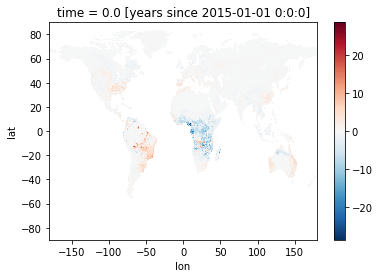

In [8]:
diff.plot()

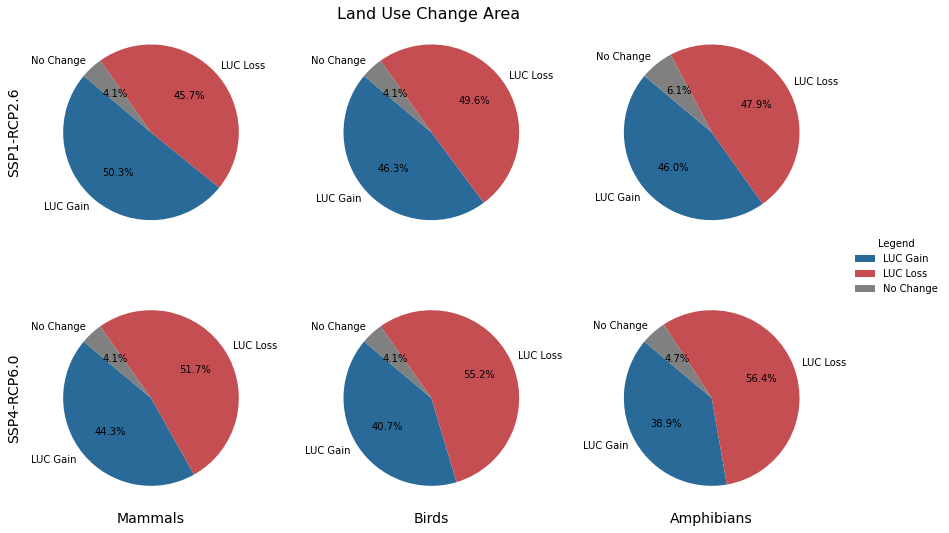

In [65]:
import matplotlib.pyplot as plt

# Example colors and labels for the pie chart segments
colors = ['#2a6a99', '#c44e52', 'grey']  # Adding grey shades for no change
labels = ['LUC Gain', 'LUC Loss', 'No Change']

# No need to calculate total_area here as it was done in each loop iteration

taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]
scenario_indices = {"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}

num_scenarios = len(scenarios)
num_taxas = len(taxas)

fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 8))  # Adjust figsize as needed

# Loop through scenarios and taxa to plot
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Assuming the plotting code for pie charts is correctly implemented here
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_luc,
                    loss_area_luc ,
                    no_change_area  ]
        # Determine the correct axis for plotting
        ax = axes[j, i] if num_scenarios > 1 or num_taxas > 1 else axes

        # Plotting pie charts logic should be here

        # Set labels on the bottom row and leftmost column only
        if j == num_scenarios - 1:  # Bottom row
            ax.set_xlabel(taxa_indices[taxa],fontsize=14)
        if i == 0:  # Leftmost column
            ax.set_ylabel(scenario_indices[scenario], labelpad=20, fontsize=14)

        ax.pie(portions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adjust subplots to leave space for scenario labels on the left
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.85, top=0.9)
plt.tight_layout()
plt.suptitle('Land Use Change Area', fontsize=16, y=0.95)
fig.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Legend', frameon=False)


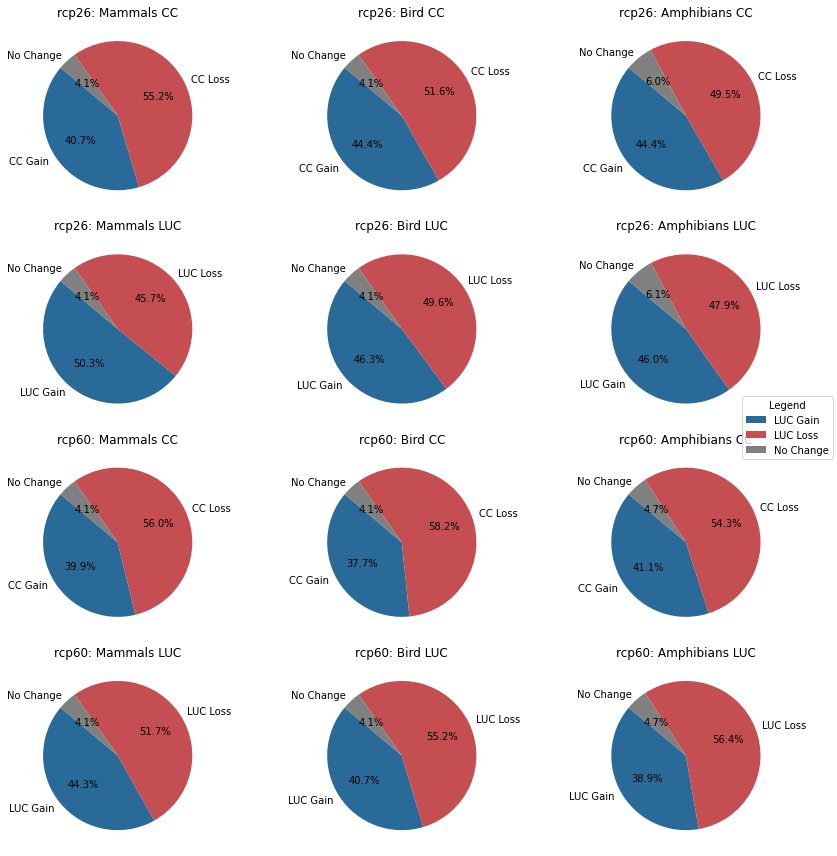

In [21]:

# Example colors and labels for the pie chart segments
colors_cc = ['#2a6a99', '#c44e52', 'grey']  # Climate Change: Gain, Loss, No Change
colors_luc = ['#a6cee3', '#b2df8a', 'grey']  # Land Use Change: Gain, Loss, No Change
labels_cc = ['CC Gain', 'CC Loss', 'No Change']
labels_luc = ['LUC Gain', 'LUC Loss', 'No Change']

taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2  # Two rows per scenario: one for CC and one for LUC
num_cols = num_taxas  # One column per taxa

# Create figure with subplots arranged in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))  # Adjust figsize as needed

# Generate pie charts for each combination of scenario and taxa
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Climate Change (CC) pie chart
        
                # Assuming your data setup is done here to calculate portions for CC and LUC
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item()
        
        ax_cc = axes[j*2, i]  # Even row indices for Climate Change
        portions_cc = [gain_area_cc, loss_area_cc, no_change_area]  # Example portions for CC
        ax_cc.pie(portions_cc, labels=labels_cc, colors=colors, autopct='%1.1f%%', startangle=140)
        ax_cc.set_title(f'{scenario}: {taxa} CC')

        # Land Use Change (LUC) pie chart
        ax_luc = axes[j*2 + 1, i]  # Odd row indices for Land Use Change
        portions_luc = [gain_area_luc, loss_area_luc, no_change_area]  # Example portions for LUC
        ax_luc.pie(portions_luc, labels=labels_luc, colors=colors, autopct='%1.1f%%', startangle=140)
        ax_luc.set_title(f'{scenario}: {taxa} LUC')
fig.legend(labels, loc='center right', title='Legend')
# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/7542606/ipykernel_51082/2830620419.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)
/scratch/local/7542606/ipykernel_51082/2830620419.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)


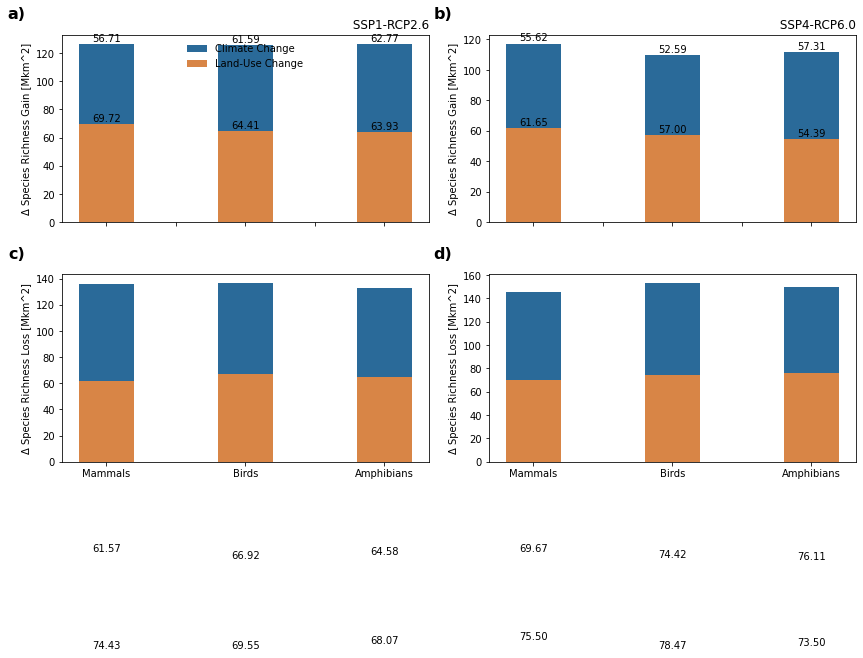

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_labels=  ["Mammals","Birds","Amphibians"] 
taxas=  ["Mammals","Bird","Amphibians"] 
color_change = "#2a6a99"
color_land_use_change = "#d88546"
# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()
        bar_cc = ax_gain.bar(x_shift, gain_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=gain_area_luc)
        bar_luc = ax_gain.bar(x_shift, gain_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_gain.text(x_shift, gain_area_luc + gain_area_cc + 0.5, f'{gain_area_cc:.2f}', ha='center', va='bottom')
        if gain_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_gain.text(x_shift, gain_area_luc + 0.5, f'{gain_area_luc:.2f}', ha='center', va='bottom')

    

    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [Mkm^2]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')



# Plot for loss
for j, scenario in enumerate(scenarios):
    ax_loss = axes[1, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        

        # Assuming 'cell_area' is a DataArray with dimensions 'lat' and 'lon'
        # and a binary mask 'land_mask' where land=1 and ocean=0

        # Apply land mask to exclude oceanic areas from the analysis
        cell_area_land_only = cell_area.where(land_mask == 1)

        # Recalculate gain and loss areas using the masked area
        gain_area_cc = xr.where((newvalue_future > newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        loss_area_cc = xr.where((newvalue_future < newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        # Repeat for land-use change calculations

        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        

        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        


        bar_cc = ax_loss.bar(x_shift, loss_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=loss_area_luc)
        bar_luc = ax_loss.bar(x_shift, loss_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_loss.text(x_shift, -(loss_area_luc + loss_area_cc) - 0.5, f'{loss_area_cc:.2f}', ha='center', va='top')
        if loss_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_loss.text(x_shift, -loss_area_luc - 0.5, f'{loss_area_luc:.2f}', ha='center', va='top')
    ax_loss.set_xticklabels(taxa_labels)
    ax_loss.set_xticks(x_positions)

    ax_loss.set_ylabel('Δ Species Richness Loss [Mkm^2]')
    ax_loss.text(-0.1, 1.15, subplot_labels[j+2], transform=ax_loss.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space if needed
plt.tight_layout()
plt.show()

total_area = gain_area_cc + abs(loss_area_cc) + gain_area_luc + abs(loss_area_luc) + no_change_area
no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()


